# Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [2]:
data = pd.read_csv('Titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### PassengerId: A unique index for each passenger.
###### Survived: Shows if the passenger survived or not (1 = survived, 0 = did not survive).
###### Pclass: Passenger Class (1 = First class ticket, 2 = Second class ticket, 3 = Third class ticket).
###### Name: The passenger's name, which also contains the title (Mr., Mrs., Doctor, et cetera).
###### Sex: The passenger's gender (male or female).
###### Age: The passenger's age (or if the age was not recorded, Nan).
###### SibSp: The number of siblings and spouses traveling with the passenger.
###### Parch: The number of parents and children traveling with the passenger.
###### Ticket: The passenger's ticket number.
###### Fare: The price of the passenger's ticket.
###### Cabin: The passenger's cabin number (or if the cabin number was not recorded, Nan).
###### Embarked: The port where the passenger boarded (C = Cherbourg, Q = Queenstown, S = Southampton).

# Data Analysis

In [4]:
data.shape

(1309, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [6]:
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<AxesSubplot:>

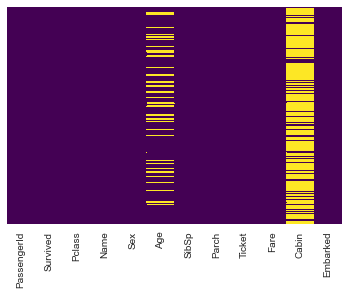

In [7]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

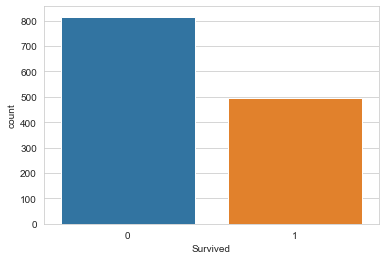

In [8]:
sns.countplot(data['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

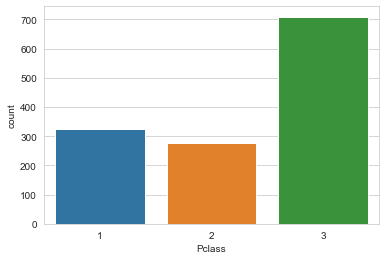

In [9]:
sns.countplot(data['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

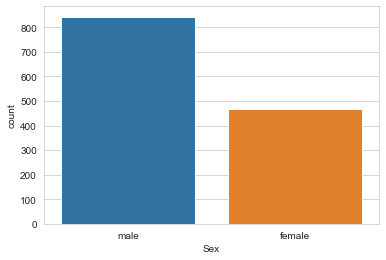

In [10]:
sns.countplot(data['Sex'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

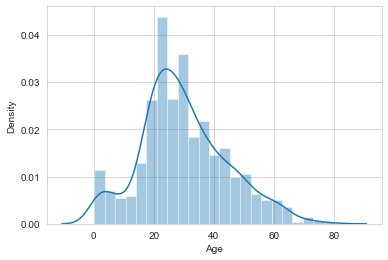

In [11]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

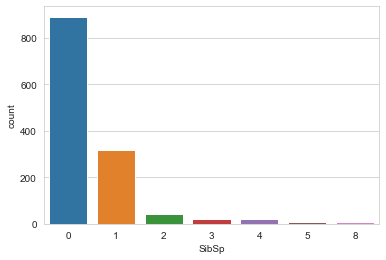

In [12]:
sns.countplot(data['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

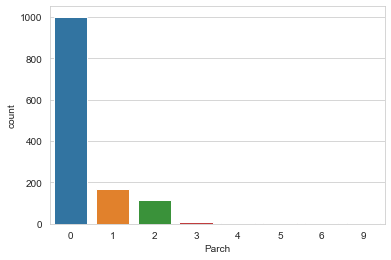

In [13]:
sns.countplot(data['Parch'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

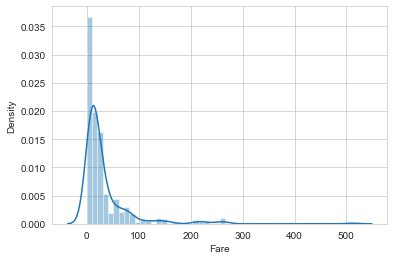

In [14]:
sns.distplot(data['Fare'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

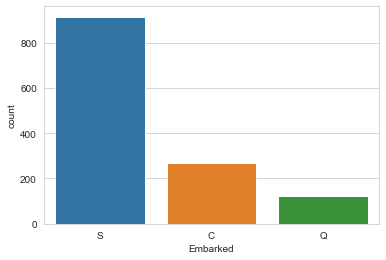

In [15]:
sns.countplot(data['Embarked'])

# Data Cleaning

#### Missing Data

In [16]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [17]:
data.drop(['Cabin'], axis = 1, inplace = True)

In [18]:
data['Embarked'].mode()[0]

'S'

In [19]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

<AxesSubplot:>

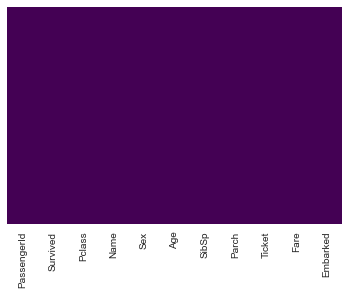

In [20]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#### Log Transformation

<AxesSubplot:xlabel='Fare', ylabel='Density'>

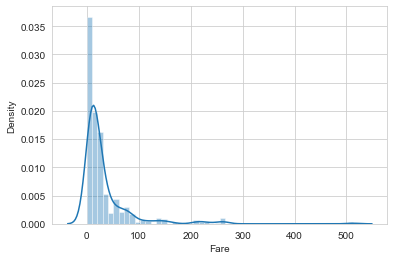

In [21]:
sns.distplot(data['Fare'])

In [22]:
data['Fare'] = np.log(data['Fare'] + 1)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

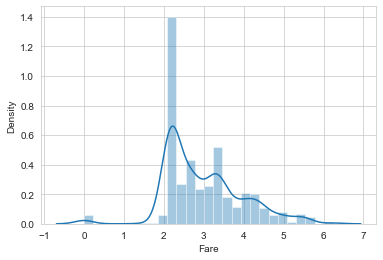

In [23]:
sns.distplot(data['Fare'])

#### Feature Selection

In [24]:
data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [25]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,2.110213,S
1,1,1,female,38.0,1,0,4.280593,C
2,1,3,female,26.0,0,0,2.188856,S
3,1,1,female,35.0,1,0,3.990834,S
4,0,3,male,35.0,0,0,2.202765,S


#### Label Encoding

In [26]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [27]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [28]:
data['Sex'] = data['Sex'].map({'male':0, 'female':1})
data['Embarked'] = data['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [29]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,2.110213,2
1,1,1,1,38.0,1,0,4.280593,0
2,1,3,1,26.0,0,0,2.188856,2
3,1,1,1,35.0,1,0,3.990834,2
4,0,3,0,35.0,0,0,2.202765,2


In [30]:
features = data.drop(['Survived'], axis = 1)
target = data['Survived']

# Split the Data

In [31]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = 0.8, random_state = 42)

# Select and Train the Model

In [32]:
model = LogisticRegression()

In [33]:
model.fit(x_train, y_train)

LogisticRegression()

In [34]:
prediction = model.predict(x_test)

# Evaluate the Model

In [35]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       159
           1       0.83      0.79      0.81       103

    accuracy                           0.85       262
   macro avg       0.85      0.84      0.84       262
weighted avg       0.85      0.85      0.85       262



# Adjust the Hyperparameters

In [36]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = 0.75, random_state = 101)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       209
           1       0.84      0.76      0.80       119

    accuracy                           0.86       328
   macro avg       0.85      0.84      0.84       328
weighted avg       0.86      0.86      0.86       328

